In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import googletrans
from googletrans import Translator
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

translator = Translator()

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

set_matplotlib_formats("retina")

df = pd.read_csv("../../info_202106_.csv")
df.rename(columns=lambda x: translator.translate(x).text, inplace=True)

columns = ['Mutual name', 'Country-in-class classification name', 'Classification name', 'Summary', 
           'Attempt', 'Life', 'Administrative name', 'Legal name', 'Street name address', 
           'Hardness', 'Latitude']
df = df[columns].copy()
df = df.rename(columns = {'Mutual name' : 'Store name', 'Summary' : 'Classification name-2', 'Attempt':'City', 'Life': 'Town','Hardness':'Longitude'})

df.head()

,Store name,Country-in-class classification name,Classification name,Classification name-2,City,Town,Administrative name,Legal name,Street name address,Longitude,Latitude
0,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 동광로18길 82,126.991394,37.488375
1,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,서울특별시 동작구 동작대로27가길 12,126.980952,37.487105
2,채움,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,서울특별시 종로구 삼봉로 81,126.981794,37.572387
3,호구의주방,소매,가정/주방/인테리어,주방가구판매,서울특별시,영등포구,양평2동,양평동4가,서울특별시 영등포구 선유로 269,126.897892,37.536700
4,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 효령로 230,127.009382,37.483436


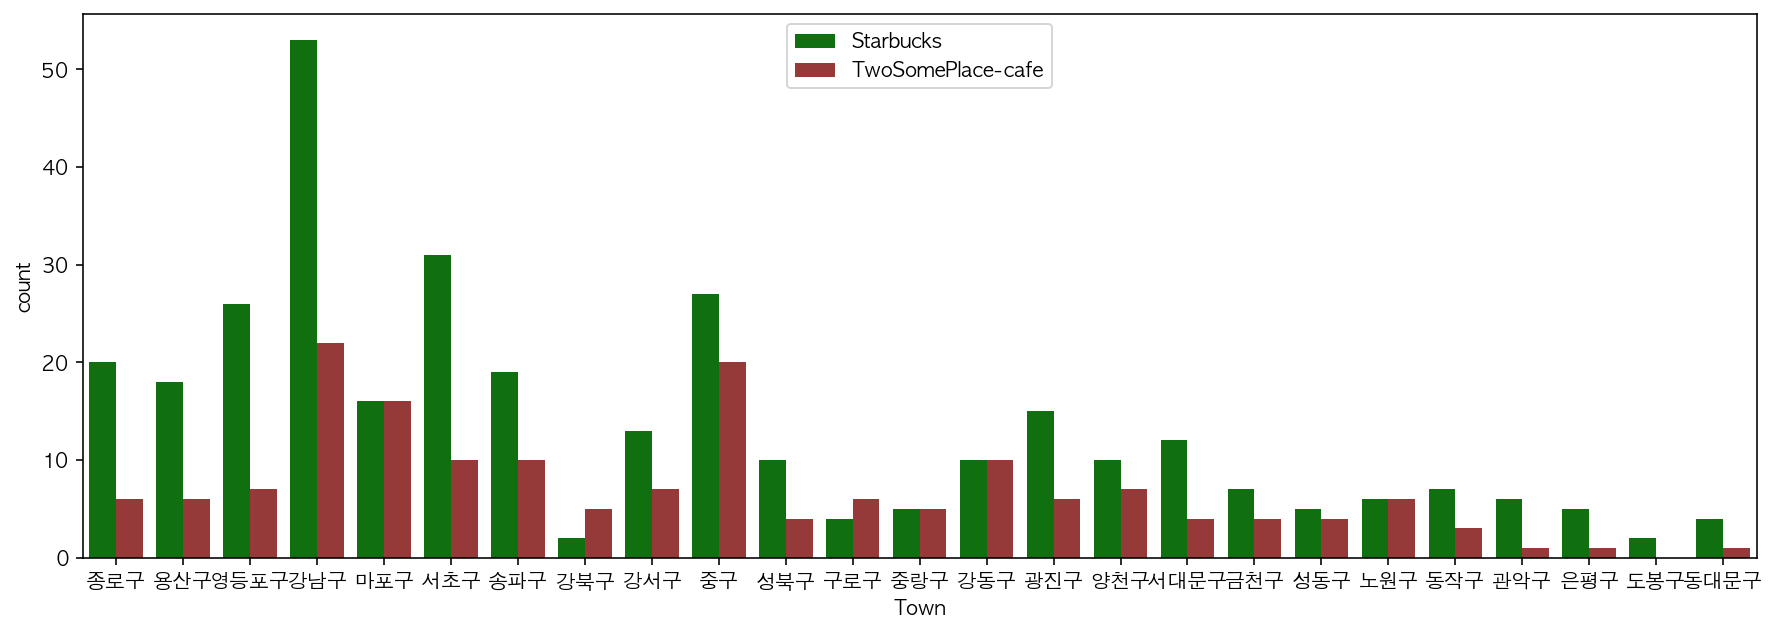

In [75]:
fig = plt.figure(figsize=(15,5))
colors = ["green", "brown"]
sns.set_palette(sns.color_palette(colors))
df_seoul = df[df["City"] == "서울특별시"].copy()
df_seoul["Store name"] = df_seoul["Store name"].str.lower()
df_cafe = df_seoul[df_seoul['Store name'].isin(['스타벅스','투썸플레이스'])]
sns.countplot(data=df_cafe, x="Town", hue="Store name")
plt.legend(labels=["Starbucks","TwoSomePlace-cafe"])

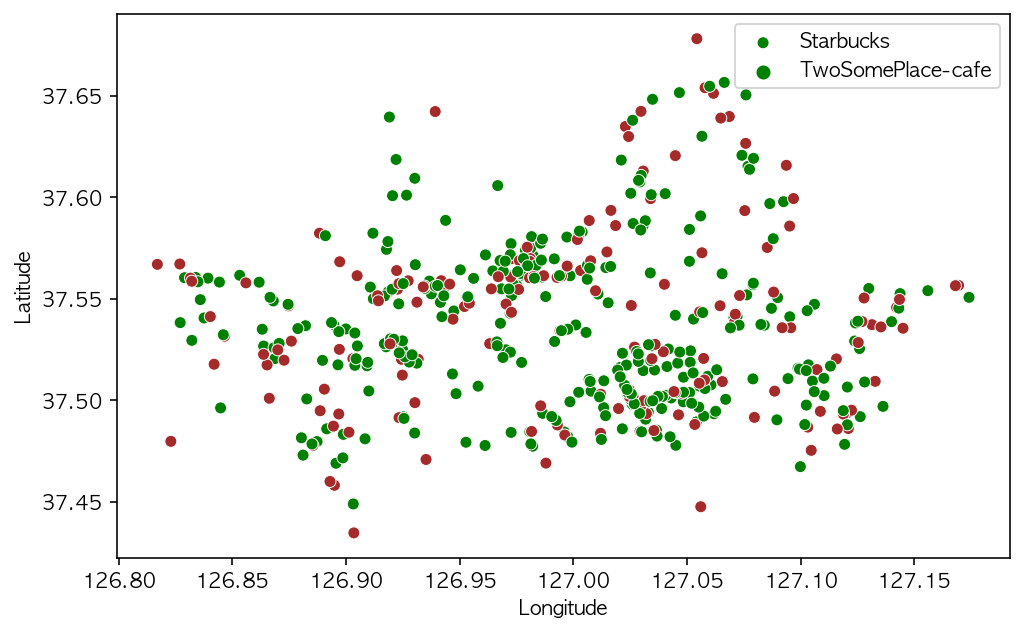

In [81]:
fig = plt.figure(figsize=(8,5))
colors = ["green", "brown"]
sns.set_palette(sns.color_palette(colors))
sns.scatterplot(data=df_cafe, x="Longitude", y="Latitude", hue="Store name")
plt.legend(labels=["Starbucks","TwoSomePlace-cafe"])

In [74]:
import folium
lat = df_cafe["Latitude"].mean()
long = df_cafe["Longitude"].mean()
lat, long
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "Latitude"]
    sub_long = df_cafe.loc[i, "Longitude"]
    
    title = f"{df_cafe.loc[i, 'Store name']} - {df_cafe.loc[i, 'Street name address']}"
    
    color = "green"
    if df_cafe.loc[i, "Store name"] == "투썸플레이스":
        color = "brown"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                          tooltip=title).add_to(m)
m